<a href="https://colab.research.google.com/github/tsarnadelis/Numerical-Analysis-Project/blob/main/Numerical_Analysis_Project_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Analysis Project**
### Calculate constants α, β using the Runge Kutta 4th order method with the given COVID data, to predict the future cases.

Start by importing the data given and plotting the values:

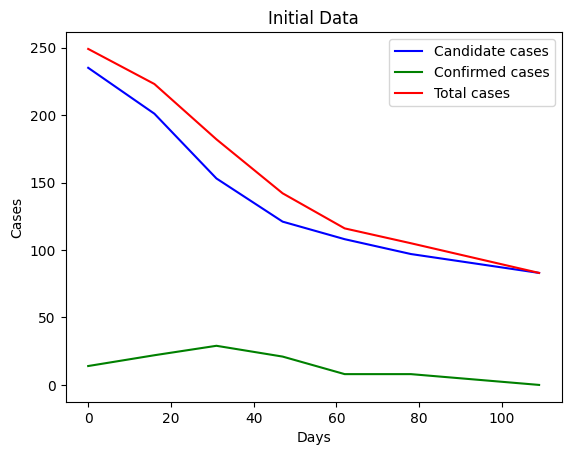

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares

days = np.array([0, 16, 31, 47, 62, 78, 109])
candidate_observed = np.array([235, 201, 153, 121, 108, 97, 83])
confirmed_observed = np.array([14, 22, 29, 21, 8, 8, 0])

total_observed = np.add(candidate_observed, confirmed_observed)

fig, ax1 = plt.subplots()
ax1.set_ylabel("Cases")
ax1.set_xlabel("Days")
ax1.plot(days, candidate_observed, color='b', label="Candidate cases")
ax1.plot(days, confirmed_observed, color='g', label="Confirmed cases")
ax1.plot(days, total_observed, color='r', label="Total cases")
ax1.legend(loc='best')
plt.title("Initial Data")
plt.show()

Define the Runge Kutta model, and the objective function that are used to calculate α, β and the prediction values of candidate and confirmed cases.

In [69]:
def model(days, alpha, beta):
    candidate_pred, confirmed_pred, total_pred = 235, 14, 249  # Initial conditions
    model_candidate = [candidate_pred]
    model_confirmed = [confirmed_pred]
    model_total = [total_pred]

    for i in range(1, len(days)):
        dt = days[i] - days[i-1]
        dcandidatedt = -alpha * candidate_pred * confirmed_pred
        dconfirmeddt = alpha * candidate_pred * confirmed_pred - beta * confirmed_pred
        dtotaldt = beta * confirmed_pred

        candidate_pred += dt * dcandidatedt
        confirmed_pred += dt * dconfirmeddt
        total_pred += dt * dtotaldt

        model_candidate.append(candidate_pred)
        model_confirmed.append(confirmed_pred)
        model_total.append(total_pred)

    return model_candidate, model_confirmed, model_total

def objective(params, days, candidate_observed, confirmed_observed):
    alpha, beta = params
    model_candidate, model_confirmed, _ = model(days, alpha, beta)

    return np.concatenate([np.array(model_candidate) - candidate_observed, np.array(model_confirmed) - confirmed_observed])

Set an initial guess for the constants and optimize. At the end extract the final values.

In [70]:
# Initial guess for alpha and beta
initial_guess = [0.001, 0.001]

# Fit the model parameters using least squares
result = least_squares(objective, initial_guess, args=(days, candidate_observed, confirmed_observed))

# Extract the optimized parameters
alpha_opt, beta_opt = result.x

#Print the optimized values
print("The optimized alpha is: ",alpha_opt)
print("The optimized beta is: ",beta_opt)

The optimized alpha is:  0.0006234800644043144
The optimized beta is:  0.11484656403994274


Using the above values, calculate the predictions and compare to the given values.

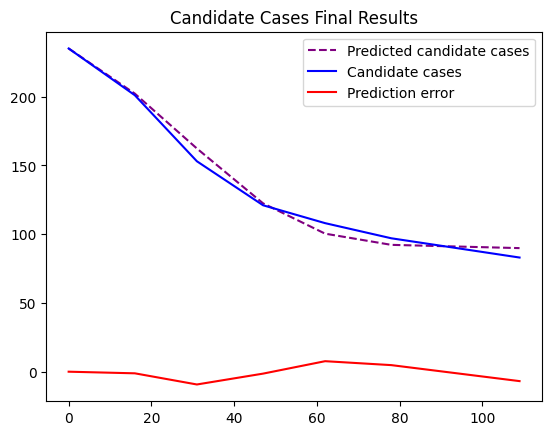

In [71]:
# Plotting the model predictions with optimized parameters
model_candidate_pred, model_confirmed_pred, model_total_pred = model(days, alpha_opt, beta_opt)

# Plot the observed and predicted candidate values and the error between them
fig, ax2 = plt.subplots()
ax2.plot(days, model_candidate_pred, color='purple', linestyle='--', label="Predicted candidate cases")
ax2.plot(days, candidate_observed, color='b', label="Candidate cases")
ax2.plot(days, np.subtract(candidate_observed,model_candidate_pred), color='r', label="Prediction error")
ax2.legend(loc='best')
plt.title("Candidate Cases Final Results")
plt.show()


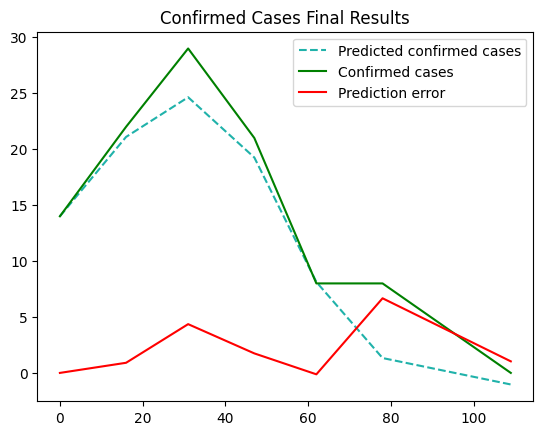

In [72]:
# Plot the observed and predicted confirmed values and the error between them
fig, ax3 = plt.subplots()
ax3.plot(days, model_confirmed_pred, color='lightseagreen', linestyle='--', label="Predicted confirmed cases")
ax3.plot(days, confirmed_observed, color='green', label="Confirmed cases")
ax3.plot(days, np.subtract(confirmed_observed,model_confirmed_pred), color='r', label="Prediction error")
ax3.legend(loc='best')
plt.title("Confirmed Cases Final Results")
plt.show()

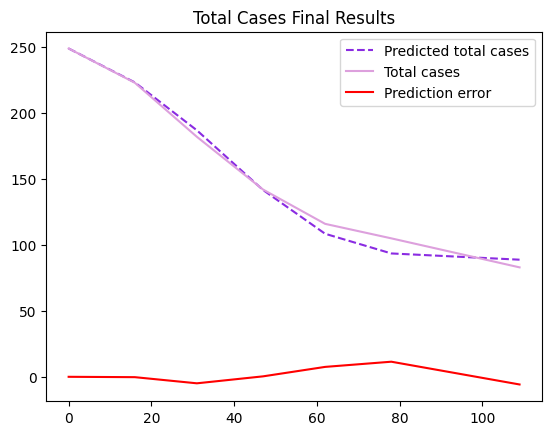

In [73]:
# Plot the observed and predicted total cases values and the error between them
fig, ax4 = plt.subplots()
ax4.plot(days, np.add(model_candidate_pred,model_confirmed_pred), color='blueviolet', linestyle='--', label="Predicted total cases")
ax4.plot(days, total_observed, color='plum', label="Total cases")
ax4.plot(days, np.subtract(total_observed,np.add(model_candidate_pred,model_confirmed_pred)), color='r', label="Prediction error")
ax4.legend(loc='best')
plt.title("Total Cases Final Results")
plt.show()

From the above diagrams, i observe that using the values α, β i found in the model, my predictions are very close to the original numbers, with only a small error. In both cases, this error is less than 10 cases in both the candidate and confirmed case values. Therefore, this is an accurate model and can be used with bigger sets of data to predict the candidate and confirmed values, assuming the α, β constants are not substantialy altered.